In Google Colab, the code snippet utilizes the 'files' module from the 'google.Colab' library to permit document uploads. When executed, the 'files.Upload()' feature prompts the user to select a document from their local machine. Once selected, the file is uploaded to the Colab enviroment. The uploaded file(s) are then accesible in the notebook session. This functionality is especially beneficial for importing outside datasets or files required for analysis or processing inside the Colab surroundings.After uploading, the file is read into a dataframe,"myFrame" using the pandas library.This DataFrame serves as the primary data structure for subsequent analysis.  The 'head()' method is then utilized to display the first few rows of the DataFrame, allowing for a quick visual inspection to ensure that the data has been successfully imported.

In [ ]:
from google.colab import files
import pandas
uploaded = files.upload()
for filename in uploaded.keys():
    print(f'File "{filename}" uploaded successfully!')

Saving SKYWARDS_DATA_CW2 (1).csv to SKYWARDS_DATA_CW2 (1).csv
File "SKYWARDS_DATA_CW2 (1).csv" uploaded successfully!


In [ ]:
myFrame = pandas.read_csv('/content/SKYWARDS_DATA_CW2 (1).csv', encoding='ISO-8859-1')
print(myFrame.head())


   Ref      id  Gender Satisfied  Age  Age Band   Type of Travel     Class  \
0    0   70172    Male         Y   13  Under 18  Personal Travel  Eco Plus   
1    1    5047    Male         N   25  25 to 34  Business travel  Business   
2    2  110028  Female         Y   26  25 to 34  Business travel  Business   
3    3   24026  Female         Y   25  25 to 34  Business travel  Business   
4    4  119299    Male         N   61  55 to 64  Business travel  Business   

   Flight Distance  Flight Distance Rounded  ... Seat comfort  \
0              460                     4760  ...            5   
1              235                      235  ...            1   
2             1142                     4760  ...            5   
3              562                      560  ...            2   
4              214                     4760  ...            5   

  Inflight entertainment  On-board service  Leg room service  \
0                      5                 4                 3   
1           

Handling duplicate values and missing values are vital steps in data preprocessing to make certain the accuracy and reliability of evaluation results.

**Handling Duplicate Values**

Duplicate values arise where there are equal rows in the dataset, which can distort analysis consequences and result in biased conclusions.
To cope with duplicates, we use the drop_duplicates() feature availed through the pandas library. This function identifies and gets rid of duplicate rows from the DataFrame, preserving  the primary occurrence of each precise row.
By doing away with duplicates, we make certain that every observation in the dataset is unique, preventing skewness in analysis effects.

**Handling Missing Values**

Missing values, additionally known as NaNs or null values, are common in  datasets because of various reasons such as data collection errors or incomplete records.
Missing values can adversely have an effect on analysis outcomes, and it is essential to address them appropriately.
We first identify missing values within the dataset by the use of features like isnull() or info(), which offer a summary of missing values throughout columns.
Depending on the volume and nature of missing values, we pick out the suitable strategy to deal with them. Common strategies include imputation (changing missing values with calculated values), deletion (eliminating rows or columns with lacking values), or superior strategies like interpolation.
In this analysis we handle both missing and null values by dropping them.
By correctly handling duplicate values and missing values, we preserve the integrity of the dataset, allowing correct and dependable analysis and insights.

In [ ]:

missing_values_count = myFrame.isnull().sum()
print("Missing Values Count:")
print(missing_values_count)
duplicates = myFrame.duplicated().sum()
print("Duplicate Values Count:", duplicates)
myFrame = myFrame.drop_duplicates()
myFrame.dropna(inplace=True)
print("\nCleaned DataFrame:")
print(myFrame.head())


Missing Values Count:
Ref                                    0
id                                     0
Gender                                 0
Satisfied                              0
Age                                    0
Age Band                               0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Flight Distance Rounded                0
Destination                            0
Continent                              0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                    

The next step shows some posible visualizations from the dataset.

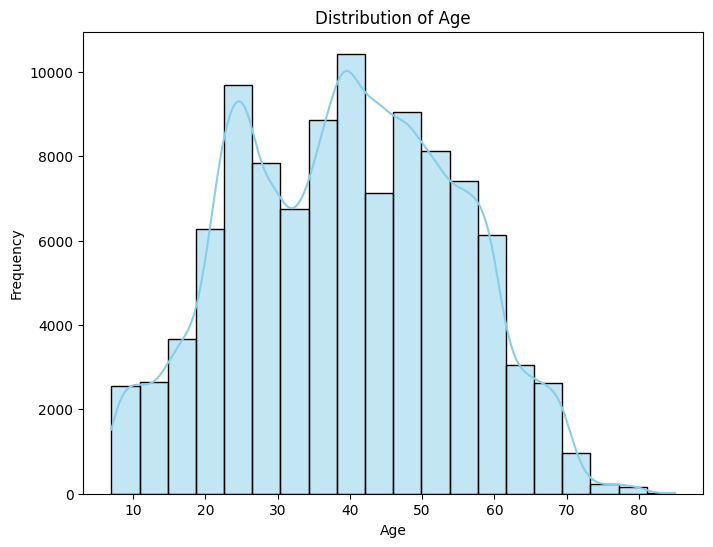

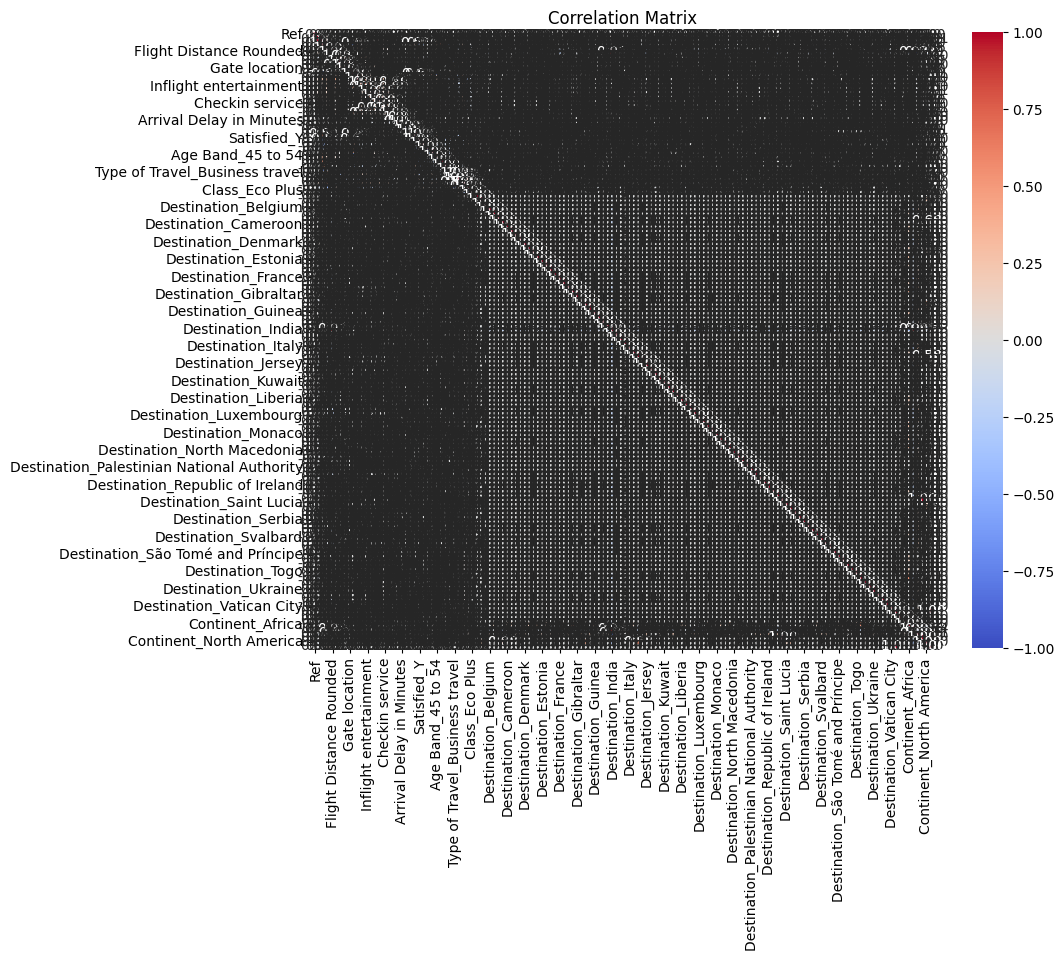

<ipython-input-38-af0ac8fc0a37>:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  seaborn.scatterplot(x='Age', y='Departure Delay in Minutes', data=myFrame, palette='coolwarm')


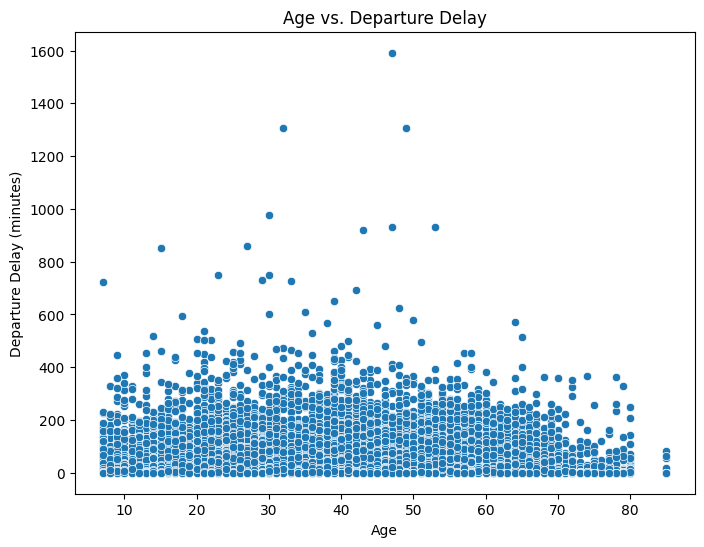

In [38]:
import matplotlib.pyplot
import seaborn

matplotlib.pyplot.figure(figsize=(8, 6))
seaborn.histplot(myFrame['Age'], bins=20, kde=True, color='skyblue')
matplotlib.pyplot.title('Distribution of Age')
matplotlib.pyplot.xlabel('Age')
matplotlib.pyplot.ylabel('Frequency')
matplotlib.pyplot.show()
# Correlation matrix heatmap
matplotlib.pyplot.figure(figsize=(20, 15))
seaborn.heatmap(myFrame.corr(), annot=True, cmap='coolwarm', fmt=".2f")
matplotlib.pyplot.title('Correlation Matrix')
matplotlib.pyplot.show()

# Scatter plot of Age vs. Departure Delay
matplotlib.pyplot.figure(figsize=(8, 6))
seaborn.scatterplot(x='Age', y='Departure Delay in Minutes', data=myFrame, palette='coolwarm')
matplotlib.pyplot.title('Age vs. Departure Delay')
matplotlib.pyplot.xlabel('Age')
matplotlib.pyplot.ylabel('Departure Delay (minutes)')
matplotlib.pyplot.show()




To attain prediction for the likelihood of 'satisfaction', we will train the machine learning model on our dataset. Since 'satisfaction' is a binary outcome (satisfied or unsatisfied), we are able to use class models. This analysis, permit's use of logistic regression model because it's a common algorithm for binary category data.We intent to predict the likelihood of passenger satisfaction by use of a logistic regression.  Features (X) and the goal variable (y) are defined, representing the unbiased variables and the binary final results of satisfaction, respectively. The dataset is split up into training and testing sets to evaluate the model's overall performance correctly. We initialize and train the logistic regression model on the training data. Subsequently, predictions are made on the testing data. Finally, we determine the model's overall performance the usage of metrics such as accuracy, confusion matrix, and classification report, providing insights into the model's capability to correctly classify passenger satisfaction. This model enables us to make informed decisions regarding passenger satisfaction  in the airline.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
categorical = myFrame.select_dtypes(include=['object']).columns
myFrame = pandas.get_dummies(myFrame, columns=categorical)
X = myFrame.drop(columns=['Satisfied_Y'])
y = myFrame['Satisfied_Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.9152951397268208

Confusion Matrix:
[[10445   952]
 [  803  8519]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     11397
           1       0.90      0.91      0.91      9322

    accuracy                           0.92     20719
   macro avg       0.91      0.92      0.91     20719
weighted avg       0.92      0.92      0.92     20719



To effectively communicate the model output and insights derived from the logistic regression model, we can make use of diverse visualization strategies and textual summaries. Here's how we will obtain this:

Confusion Matrix: Visualizing the confusion matrix gives a clear evaluation of the model's performance in phrases of true positives, false positives, true negatives, and false negatives.

Classification Report: A textual summary of precision, consider, F1-score, and help for each class (satisfied and unsatisfied passengers) can provide greater distinctive overall performance metrics.

Feature Importance: We can analyze the coefficients of the logistic regression version to understand the effect of each characteristic on passenger pride.

ROC Curve and AUC Score: Plotting the Receiver Operating Characteristic (ROC) curve and calculating the Area Under the Curve (AUC) rating offers insights into the model's potential to discriminate between satisfied and unsatisfied passengers across different probability thresholds.

Predicted Probabilities Distribution: Visualizing the distribution of predicted probabilities for every class can offer insights into the model's efficiency in its predictions.


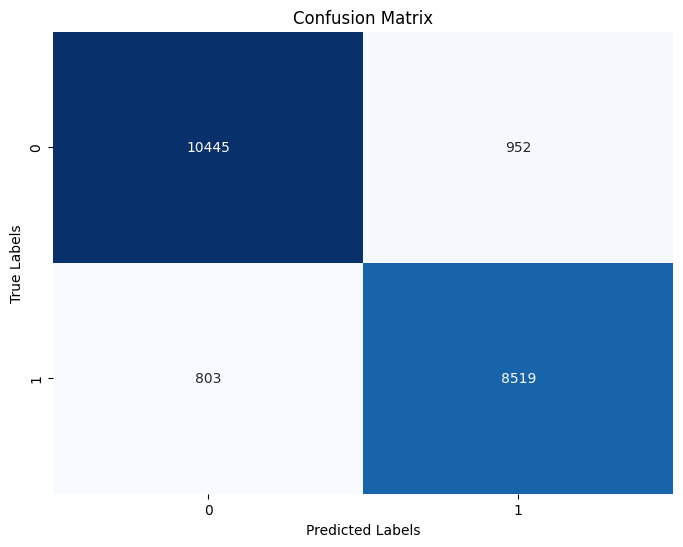

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     11397
           1       0.90      0.91      0.91      9322

    accuracy                           0.92     20719
   macro avg       0.91      0.92      0.91     20719
weighted avg       0.92      0.92      0.92     20719



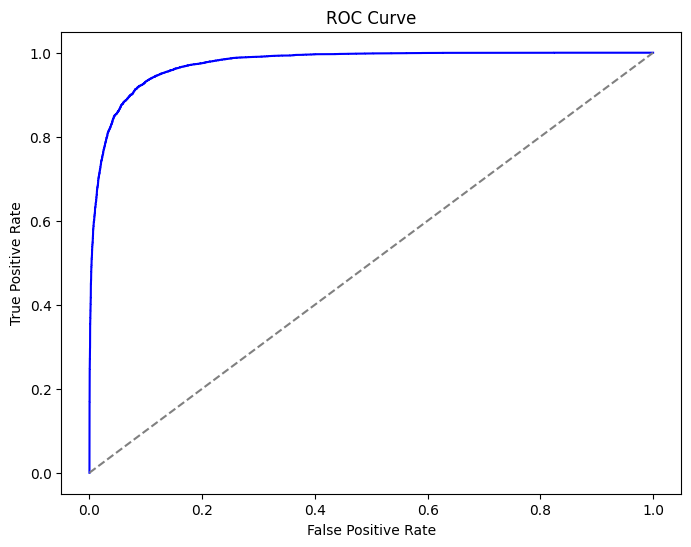

AUC Score: 0.9743834299450257


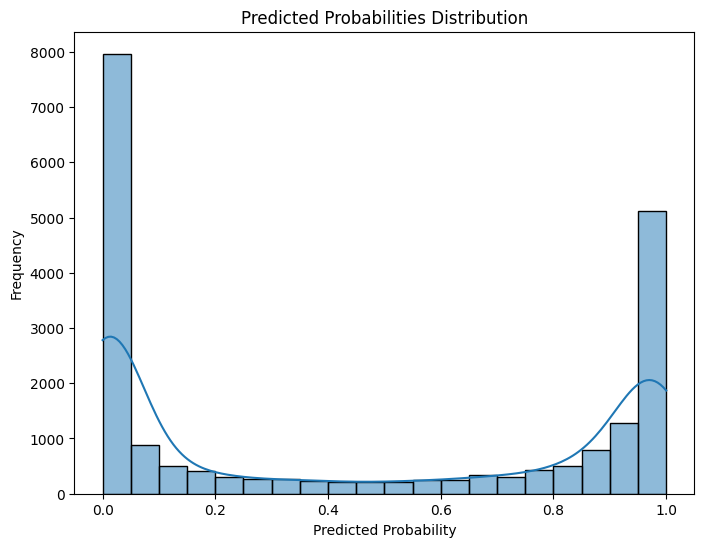

In [ ]:
import matplotlib.pyplot
import seaborn
matplotlib.pyplot.figure(figsize=(8, 6))
seaborn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
matplotlib.pyplot.xlabel('Predicted Labels')
matplotlib.pyplot.ylabel('True Labels')
matplotlib.pyplot.title('Confusion Matrix')
matplotlib.pyplot.show()
print("Classification Report:")
print(class_report)
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
matplotlib.pyplot.figure(figsize=(8, 6))
matplotlib.pyplot.plot(fpr, tpr, color='blue')
matplotlib.pyplot.plot([0, 1], [0, 1], linestyle='--', color='gray')
matplotlib.pyplot.xlabel('False Positive Rate')
matplotlib.pyplot.ylabel('True Positive Rate')
matplotlib.pyplot.title('ROC Curve')
matplotlib.pyplot.show()
auc_score = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc_score)
matplotlib.pyplot.figure(figsize=(8, 6))
seaborn.histplot(y_probs, bins=20, kde=True)
matplotlib.pyplot.xlabel('Predicted Probability')
matplotlib.pyplot.ylabel('Frequency')
matplotlib.pyplot.title('Predicted Probabilities Distribution')
matplotlib.pyplot.show()

